<a href="https://colab.research.google.com/github/architaw/ImageProcessingAssignments/blob/master/Assignment_1_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Quantization

In this task, you have to write a simple code to change the [Quantisation](https://www.tutorialspoint.com/dip/concept_of_quantization.htm) level of a given digital image. The default quantisation level for digital images are 8-bits (i.e. 256 levels). We will use two different quantisation methods.

* Uniform
* Lloyd Max

Please refer to the class slides on both methods. For other reference you can follow [this](http://www.cspl.umd.edu/631/631pub06_sec8bcompressBasic.pdf) or [this](https://web.stanford.edu/class/ee398a/handouts/lectures/05-Quantization.pdf)

In [ ]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-jezbe4lu
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=3b82b36acb66e6e5c41156b53fb3dd55be57bff6119f74b3ad628e6c98c5f361
  Stored in directory: /tmp/pip-ephem-wheel-cache-kqu2ywax/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-jezbe4lu


In [ ]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset

download_dataset(assignment_no=1, task_no=3) # download data for this assignment

Download Complete!


### Task 3.1 Quantisation on Grayscale Image

In [ ]:
def uniform_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use uniform quantisation.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels
                       - Note that range should always be between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    levels = 8 - quantisation_bit
    factor = 2**levels
    new_img = img//factor
    new_img = new_img*factor
    print(set(new_img.flatten()))

    return new_img    
    #############################
    # End your code here ########
    #############################

{0, 128}
{0, 64, 128, 192}
{32, 64, 96, 128, 160, 192, 224, 0, 80, 48, 112, 144, 176, 208, 16}
{128, 0, 132, 4, 136, 8, 140, 12, 144, 16, 148, 20, 152, 24, 156, 28, 160, 32, 164, 36, 40, 168, 44, 172, 48, 176, 52, 180, 56, 184, 60, 188, 64, 192, 68, 196, 72, 200, 76, 204, 80, 208, 84, 212, 88, 216, 92, 220, 96, 224, 100, 228, 104, 108, 112, 116, 120, 124}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 1

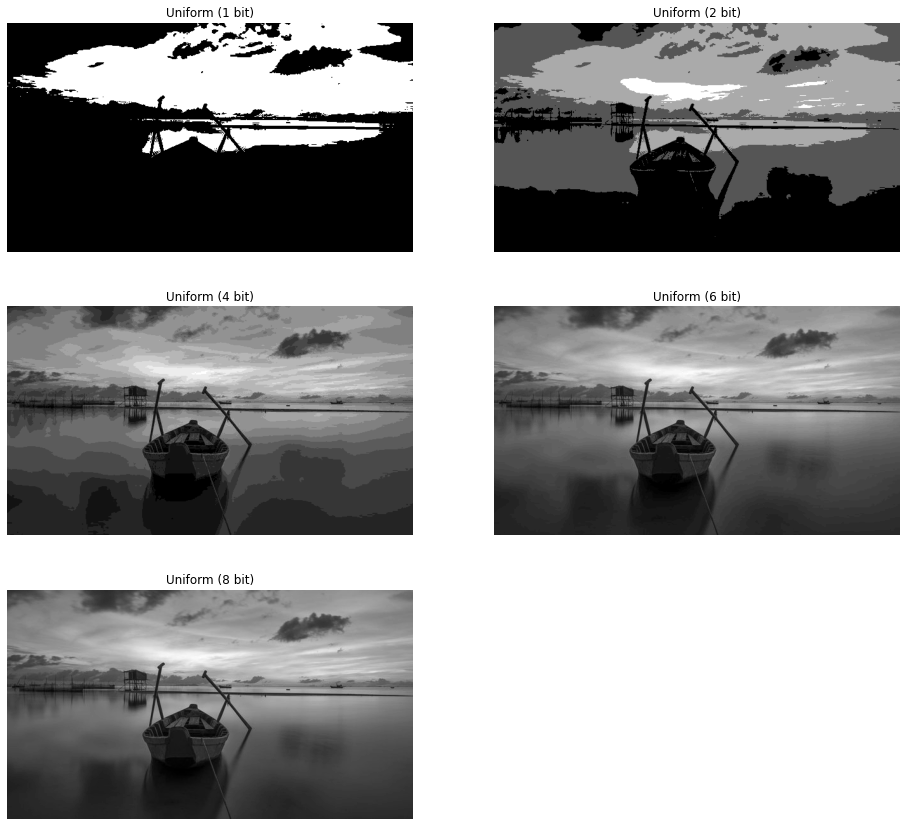

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_gray = cv2.imread("data/boat_gray.jpg", 0)

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [1,2, 4, 6, 8]:
    img_uni = uniform_quantisatioon(boat_gray, quantisation_bit=i)
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    
    count += 1
    
plt.show()

In [ ]:
def nonuniform_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use Lloyd-Max non-uniform quantisation method.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels i.e. '0' and '255'
                       - Note that range should always between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    
    #############################
    # End your code here ########
    #############################    
    
    return img

#### Quantise the given image for following bit-levels = 2, 4, 6, 8 using both the methods. 
Run below cell to plot images in a pyplot table and write your observation on the differences.

{0, 64, 128, 192}
{32, 64, 96, 128, 160, 192, 224, 0, 80, 48, 112, 144, 176, 208, 16}
{128, 0, 132, 4, 136, 8, 140, 12, 144, 16, 148, 20, 152, 24, 156, 28, 160, 32, 164, 36, 40, 168, 44, 172, 48, 176, 52, 180, 56, 184, 60, 188, 64, 192, 68, 196, 72, 200, 76, 204, 80, 208, 84, 212, 88, 216, 92, 220, 96, 224, 100, 228, 104, 108, 112, 116, 120, 124}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 

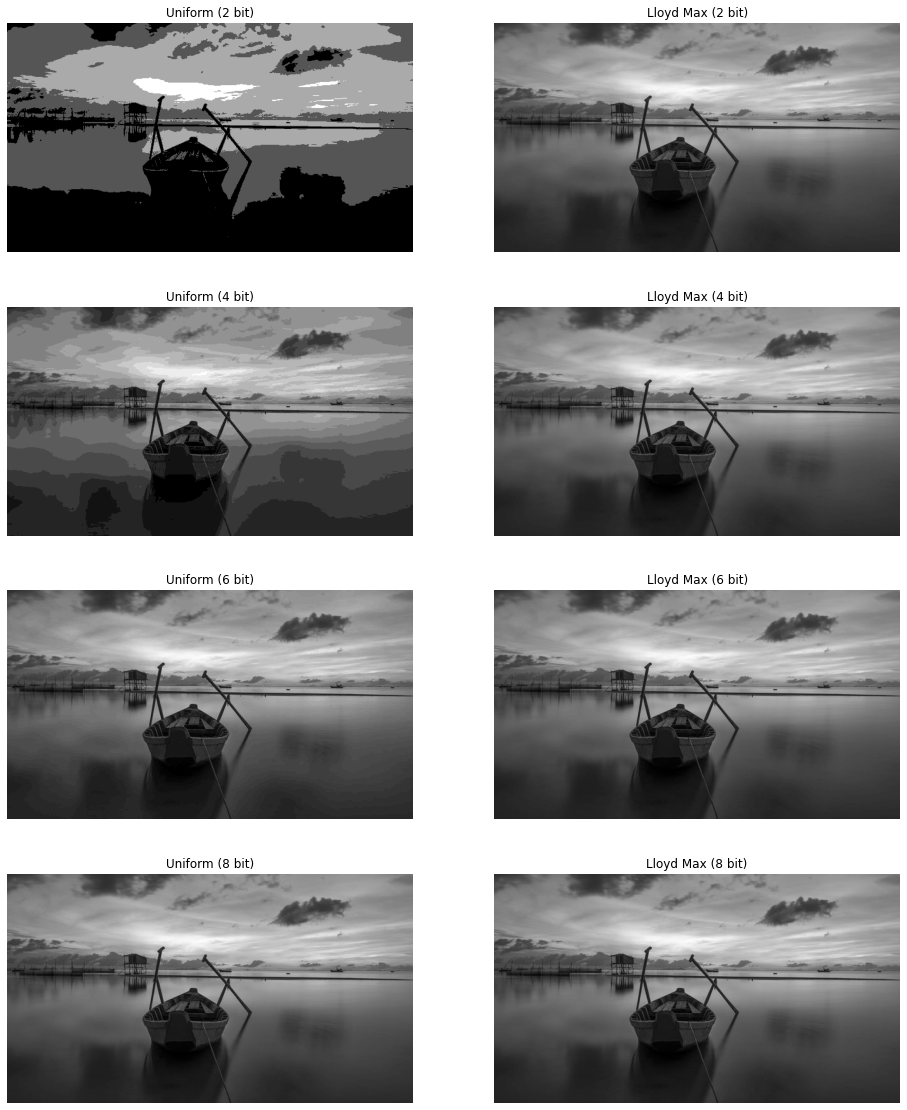

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_gray = cv2.imread("data/boat_gray.jpg", 0)

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray")
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [2, 4, 6, 8]:
    img_uni = uniform_quantisatioon(boat_gray, quantisation_bit=i)
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    
    img_lloyd = nonuniform_quantisatioon(boat_gray, quantisation_bit=i)
    plot_frame(count+1, img_lloyd, "Lloyd Max (" + str(i) + " bit)")
    
    count += 2
    
plt.show()

In [ ]:
your_observation = """
Replace this with your observations.
"""

print(your_observation)


Replace this with your observations.



### Task 3.2 Quantisation on Colored Images

Use your previous implementation to apply quantisation to each individual channels of colored image "separately".

In [ ]:
def uniform_color_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use uniform quantisation.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels
                       - Note that range should always be between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    Hint:
    + Use uniform_quantisation() to each channel.
    
    '''
    #############################
    # Start your code from here #
    #############################
    levels = 8 - quantisation_bit
    factor = 2**levels
    new_img = img//factor
    new_img = new_img*factor
    print(set(new_img.flatten()))
    return new_img
    #############################
    # End your code here ########
    #############################    
    


{64, 0, 128, 192}
{64, 32, 96, 128, 160, 192, 224, 0, 48, 80, 112, 144, 16, 176, 208, 240}
{128, 0, 132, 4, 136, 8, 140, 12, 144, 16, 148, 20, 152, 24, 156, 28, 32, 160, 36, 164, 40, 168, 44, 172, 48, 176, 52, 180, 56, 184, 60, 188, 64, 192, 68, 196, 72, 200, 76, 204, 80, 208, 84, 212, 88, 216, 92, 220, 96, 224, 248, 100, 228, 104, 232, 108, 236, 112, 240, 116, 244, 252, 120, 124}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 

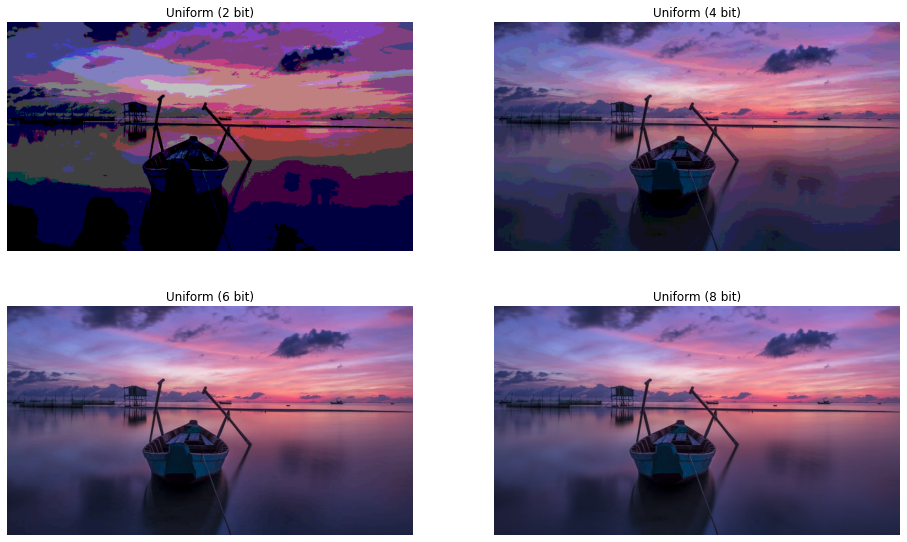

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_color = cv2.imread("data/boat.jpg")

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [2, 4, 6, 8]:
    img_uni = uniform_color_quantisatioon(boat_color, quantisation_bit=i)
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    count += 1
    
plt.show()

In [ ]:
def nonuniform_color_quantisatioon(img, quantisation_bit=8):
    '''
    Write a program to change the quantisation level of the given image to 2^quantisation_bit levels. 
    In this one you have to use Lloyd-Max non-uniform quantisation method.
    
    Inputs:                      
    + quantisation_bit - (Must be <= 8)
                       - Consider uniform quantisation with level from [0, 2^quantisation_bit)
                       - For eg. for 8-bit quantisation - There should be 256 different quantisation levels
                       - for 1-bit quantisation - There should be 2 different quantisation levels i.e. '0' and '255'
                       - Note that range should always between 0, 255
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8)
    
    Allowed external package:
    + You are free to use np.histogram module or any suitable module which you will need.
    + You must not use any direct implementation.
    
    Hint:
    + Use uniform_quantisation() to each channel.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    
    #############################
    # End your code here ########
    #############################    
    
    return img

#### Quantise the given image for following bit-levels = 2, 4, 6, 8 using both the methods. 
Run below cell to plot images in a pyplot table and write your observation on the differences.

{64, 0, 128, 192}
{64, 32, 96, 128, 160, 192, 224, 0, 48, 80, 112, 144, 16, 176, 208, 240}
{128, 0, 132, 4, 136, 8, 140, 12, 144, 16, 148, 20, 152, 24, 156, 28, 32, 160, 36, 164, 40, 168, 44, 172, 48, 176, 52, 180, 56, 184, 60, 188, 64, 192, 68, 196, 72, 200, 76, 204, 80, 208, 84, 212, 88, 216, 92, 220, 96, 224, 248, 100, 228, 104, 232, 108, 236, 112, 240, 116, 244, 252, 120, 124}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 

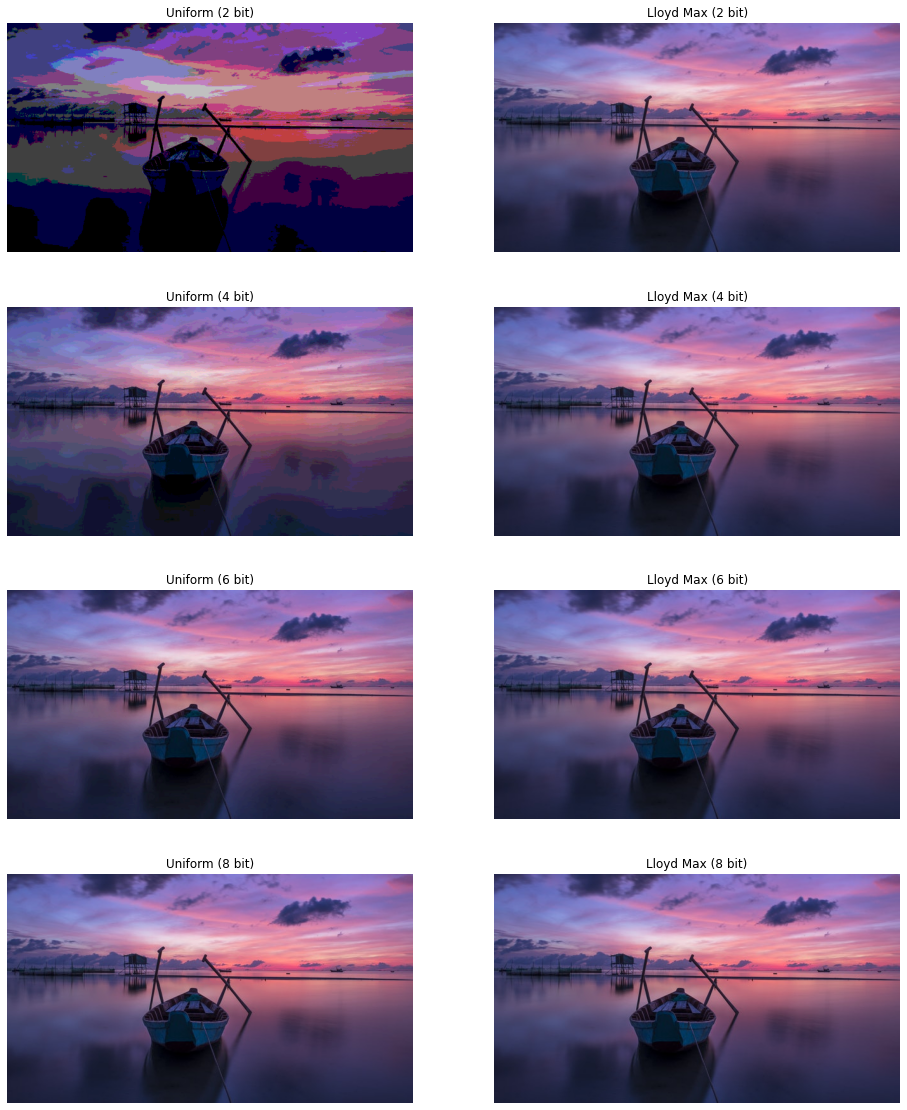

In [ ]:
# Do not change codes inside this cell
# Add your observations in next cell

boat_color = cv2.imread("data/boat.jpg")

def plot_frame(subplot_id, img, name):
    plt.subplot(4, 2, 1 + int(subplot_id))
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.title(name)
    
plt.figure(figsize=(16, 20))

count = 0
for i in [2, 4, 6, 8]:
    img_uni = uniform_color_quantisatioon(boat_color, quantisation_bit=i)
    plot_frame(count, img_uni, "Uniform (" + str(i) + " bit)")
    
    img_lloyd = nonuniform_color_quantisatioon(boat_color, quantisation_bit=i)
    plot_frame(count+1, img_lloyd, "Lloyd Max (" + str(i) + " bit)")
    
    count += 2
    
plt.show()

In [ ]:
your_observation = """
Replace this with your observations.
"""

print(your_observation)


Replace this with your observations.

